In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Caracteristicas principales de la Muestra


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
datos = df.drop_duplicates(subset="diagnosis")
datos

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
19  8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
19          0.09779           0.08129         0.06664              0.04781   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33            184.6      2019.0            0.1622   
19  ...          19.26             99.7       711.2            0.1440   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.6656           0.7119                0.2654          0.4601   
19             0.1773           0.2390                0.1288          0.2977   

    fractal_dimension_worst  Unnamed: 32  
0                   0.11890          NaN  
19                  0.07259          NaN  

[2 rows x 33 columns]

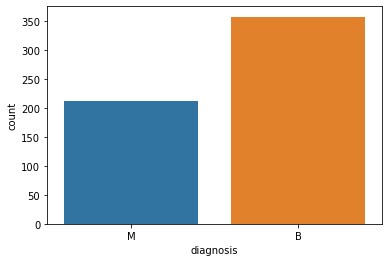

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.countplot(x = "diagnosis",data = df)
plt.show()

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

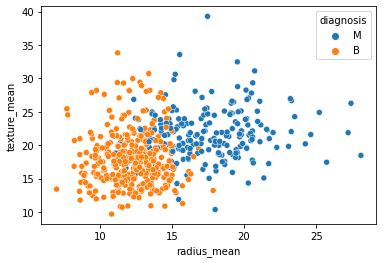

In [7]:
sns.scatterplot(x='radius_mean',y="texture_mean",hue="diagnosis",data=df)

<AxesSubplot:xlabel='perimeter_worst', ylabel='area_worst'>

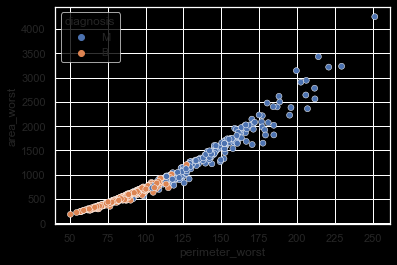

In [17]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
sns.scatterplot(x='perimeter_worst',y="area_worst",hue="diagnosis",data=df)

(array([ 41., 144., 198., 118.,  49.,  15.,   3.,   1.]),
 array([ 9.71   , 13.40625, 17.1025 , 20.79875, 24.495  , 28.19125,
        31.8875 , 35.58375, 39.28   ]),
 <BarContainer object of 8 artists>)

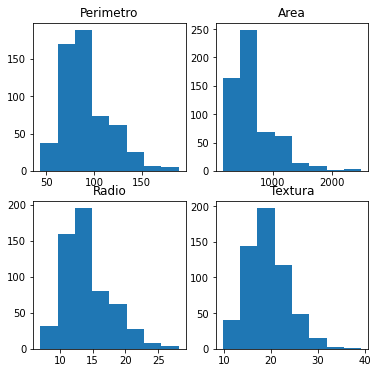

In [9]:
fig, axes = plt.subplots(2,2 ,figsize = (6,6))

b = round(1+np.log2(150))


axes[0,0].set_title("Perimetro")
axes[0,0].hist(df['perimeter_mean'],bins=b)
axes[0,1].set_title("Area")
axes[0,1].hist(df['area_mean'],bins=b)
axes[1,0].set_title("Radio")
axes[1,0].hist(df['radius_mean'],bins=b)
axes[1,1].set_title("Textura")
axes[1,1].hist(df['texture_mean'],bins=b)

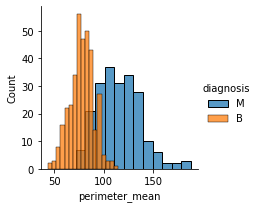

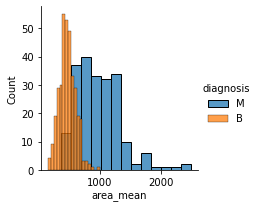

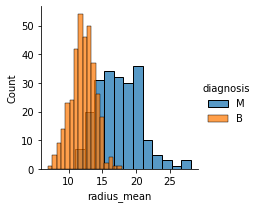

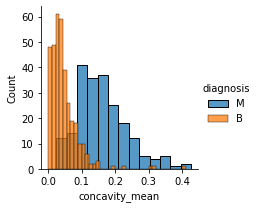

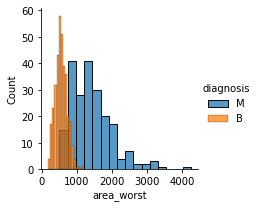

In [13]:
#Histogramas con graficas de distribucion
plot = sns.FacetGrid(df,hue="diagnosis")
plot.map(sns.histplot,"perimeter_mean").add_legend()

plot = sns.FacetGrid(df,hue="diagnosis")
plot.map(sns.histplot,"area_mean").add_legend()

plot = sns.FacetGrid(df,hue="diagnosis")
plot.map(sns.histplot,"radius_mean").add_legend()

plot = sns.FacetGrid(df,hue="diagnosis")
plot.map(sns.histplot,"concavity_mean").add_legend()

plot = sns.FacetGrid(df,hue="diagnosis")
plot.map(sns.histplot,"area_worst").add_legend()
plt.show()